C:\Users\bhuwan\AppData\Local\Temp\ipykernel_9060\4054948717.py:12: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  bat_df['start_time'] = pd.to_datetime(bat_df['start_time'], errors='coerce', dayfirst=True)


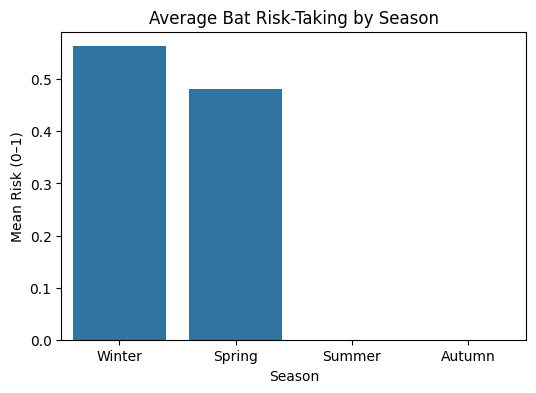

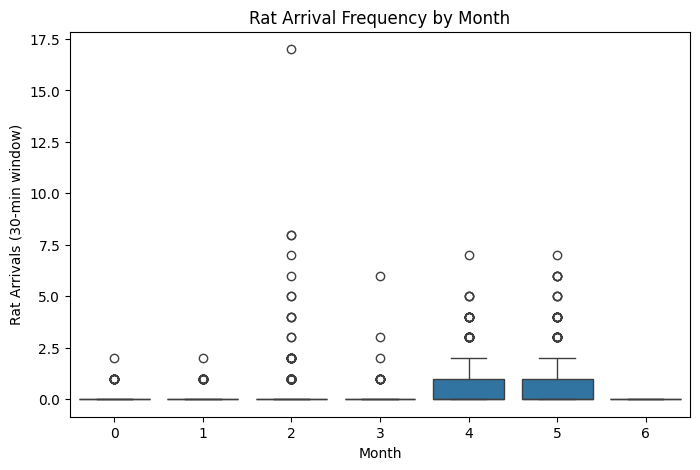

T-statistic = 1.83, p-value = 0.0680


In [ ]:
# 3_visualization_investigationB.ipynb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load cleaned data
bat_df = pd.read_csv("../data/bat_cleaned.csv")
rat_df = pd.read_csv("../data/rat_cleaned.csv")

# Ensure datetime and derive season labels from calendar months
bat_df['start_time'] = pd.to_datetime(bat_df['start_time'], errors='coerce', dayfirst=True)
months = bat_df['start_time'].dt.month
season_label = pd.Series(index=bat_df.index, dtype='string')
season_label[(months == 12) | (months <= 2)] = 'Winter'
season_label[(months >= 3) & (months <= 5)] = 'Spring'
season_label[(months >= 6) & (months <= 8)] = 'Summer'
season_label[(months >= 9) & (months <= 11)] = 'Autumn'
bat_df['season_label'] = season_label

# Bar plot: Average bat risk by season
season_risk = bat_df.groupby('season_label')['risk'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=season_risk, x='season_label', y='risk', order=['Winter','Spring','Summer','Autumn'])
plt.title("Average Bat Risk-Taking by Season")
plt.ylabel("Mean Risk (0–1)")
plt.xlabel("Season")
plt.savefig("../report/Figures/average_risk_by_season.png", dpi=300)
plt.show()

# Boxplot: Rat arrival numbers by month
plt.figure(figsize=(8,5))
sns.boxplot(data=rat_df, x='month', y='rat_arrival_number')
plt.title("Rat Arrival Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Rat Arrivals (30-min window)")
plt.savefig("../report/Figures/rat_arrival_by_month.png", dpi=300)
plt.show()

# Statistical test: Risk difference between winter and spring
winter_risk = bat_df.loc[bat_df['season_label'] == 'Winter', 'risk'].dropna()
spring_risk = bat_df.loc[bat_df['season_label'] == 'Spring', 'risk'].dropna()


if len(winter_risk) >= 2 and len(spring_risk) >= 2:
	# Use unequal-variance t-test by default
	t_stat, p_val = ttest_ind(winter_risk, spring_risk, equal_var=False)
	print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
else:
	print(f"Insufficient data for t-test: winter n={len(winter_risk)}, spring n={len(spring_risk)}")
